# **First, I will import some libraries I will use.**


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,10)

# **Reading the data from  csv file**

In [55]:
df1 = pd.read_csv('Data/bengaluru_house_prices.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# **Data Cleaning and EDA**


In [56]:
df1.shape

(13320, 9)

In [57]:
df1['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [58]:
df2 = df1.drop(['area_type', 'balcony', 'society', 'availability'], axis= 1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [59]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [60]:
df2 = df2.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [61]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [62]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [63]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [64]:
df2[df2.bhk> 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [65]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [66]:
def is_not_float(x):

    try:
        float(x)
        return False
    except:
        return True
    

In [67]:
df2[df2['total_sqft'].apply(is_not_float)].head(15)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [68]:
def convert_sqft_to_num(x):

# split the range and get the average
    tokens = x.split('-')
    if len(tokens) == 2:
        return np.average([ float(tokens[0]), float(tokens[1]) ])
    
# get the float numbers
    try: 
        return float(x)
    except:
        return None

In [69]:
df2['total_sqft'] = df2['total_sqft'].apply(convert_sqft_to_num)
df2.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [70]:
#create new column, price per square feet 
df2['price_per_sqft'] = df2['price']*100000 / df2['total_sqft']
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [71]:
df2['location'] = df2['location'].apply(lambda  x: x.strip())
location_stats = df2.location.value_counts().sort_values(ascending= False)
location_stats

location
Whitefield                       535
Sarjapur  Road                   392
Electronic City                  304
Kanakpura Road                   266
Thanisandra                      236
                                ... 
Old Mangammanapalya Road           1
HAL Layout                         1
Gubbi Cross, Hennur Main Road      1
Jeevanhalli                        1
Abshot Layout                      1
Name: count, Length: 1293, dtype: int64

In [72]:
len(location_stats[location_stats<= 10])

1052

In [73]:
location_stats_less_than_10 = location_stats[location_stats<= 10]
location_stats_less_than_10

location
Ganga Nagar                      10
Nagadevanahalli                  10
Dodsworth Layout                 10
1st Block Koramangala            10
Kalkere                          10
                                 ..
Old Mangammanapalya Road          1
HAL Layout                        1
Gubbi Cross, Hennur Main Road     1
Jeevanhalli                       1
Abshot Layout                     1
Name: count, Length: 1052, dtype: int64

In [74]:
print('The Unique Number of locations is:', df2['location'].nunique())

The Unique Number of locations is: 1293


In [75]:
# replace any location that has a frequense smaller than or equal to 10 with 'other'

df2['location'] = df2['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
print('The Unique Number of locations after replacement is:', df2['location'].nunique())

The Unique Number of locations after replacement is: 242


In [76]:
df2.head(15)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [77]:
df2[(df2['total_sqft']/ df2['bhk']) < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [78]:
df2.shape

(13246, 7)

In [79]:
df2 = df2[~((df2['total_sqft']/ df2['bhk']) < 300)]
df2.shape

(12502, 7)

In [80]:
df2['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [81]:
def remove_pps_outliers (df):

    df_out = pd.DataFrame()

    # Considering that this data has a standard distribution 
    #I will take the first std per location and drop the other records

    for key, sub_df in df.groupby('location'):
        m = np.mean(sub_df.price_per_sqft)
        st = np.std(sub_df.price_per_sqft)
        reduced_df = sub_df[(sub_df.price_per_sqft > (m-st)) & (sub_df.price_per_sqft<= (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index= True)
    
    return df_out

In [82]:
df3 = remove_pps_outliers(df2)
df3.shape

(10241, 7)

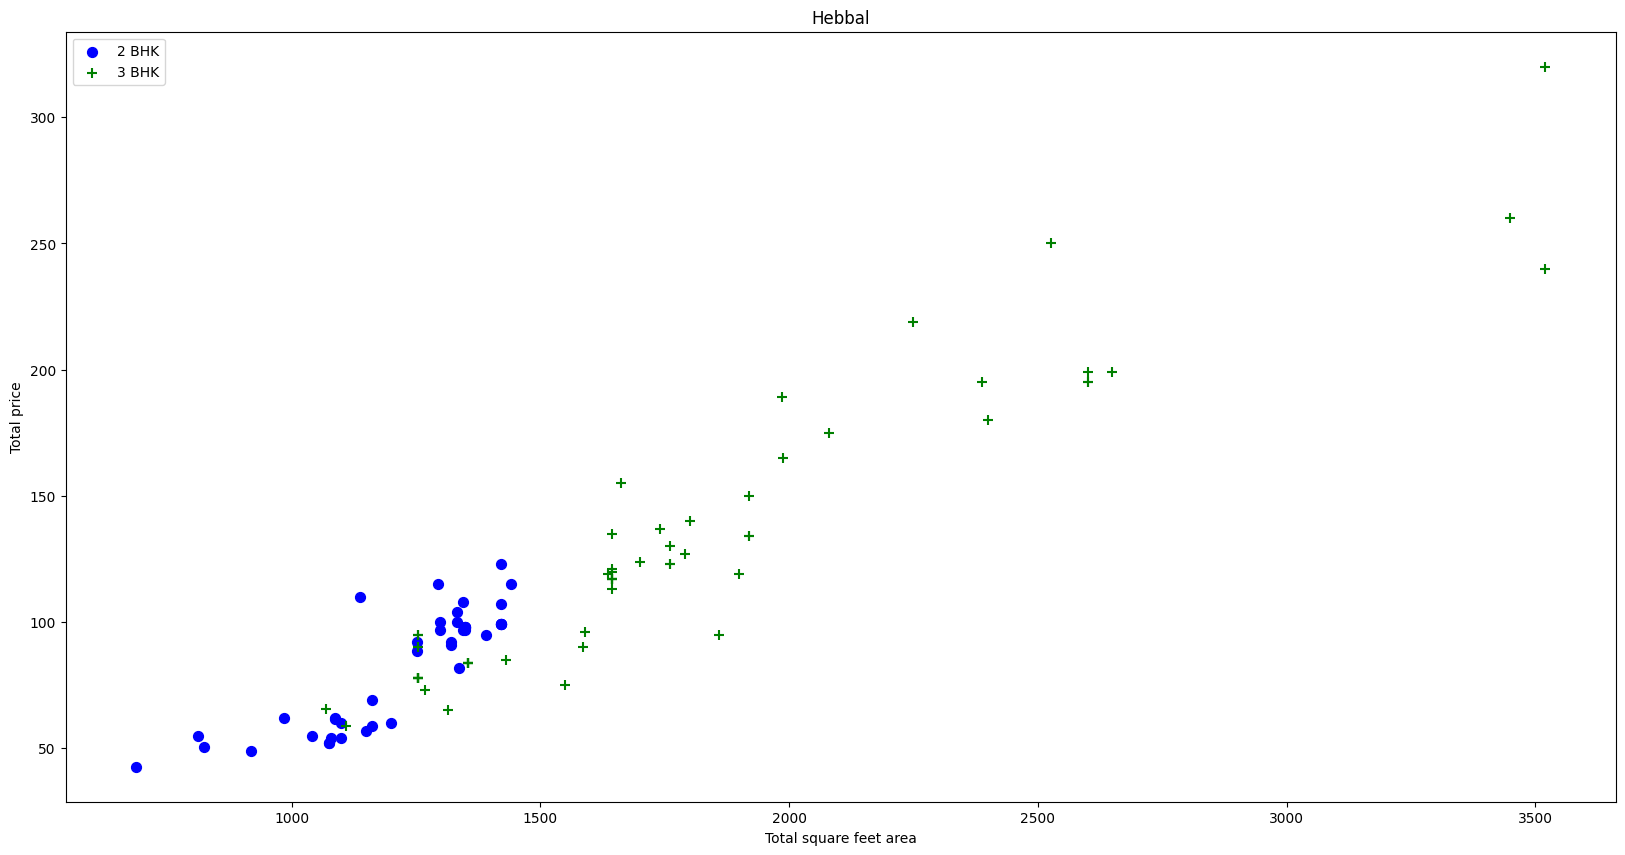

In [83]:
def plot_scatter_chart (df, location):

    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]

    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color = 'green', marker= '+', label = '3 BHK', s = 50)
    plt.xlabel('Total square feet area')
    plt.ylabel('Total price')
    plt.title(location)
    plt.legend()

plot_scatter_chart(df3, 'Hebbal')

## `remove_bhk_outliers` Function

- **Grouping by Location**: The function processes each location separately.
- **Calculating BHK Statistics**: For each location, it calculates statistics (mean, standard deviation, count) for each `bhk` group.
- **Identifying Outliers**: It identifies outliers in each `bhk` group by comparing `price_per_sqft` with the mean of the `bhk-1` group if that group has more than 5 records.
- **Dropping Outliers**: It removes the identified outliers and returns the cleaned DataFrame.

In [84]:
def remove_bhk_outliers(df):

    ''''
    The remove_bhk_outliers function aims to identify and remove outliers in the price_per_sqft column of a DataFrame based on the number of bedrooms (bhk). The outliers are determined by comparing each bhk group's price_per_sqft with the statistics of the group with one less bedroom (bhk-1).
    '''

    exclude_indices = np.array([])

    for location, location_df in df.groupby('location'):
        bhk_stats = {}

        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    
    return df.drop(exclude_indices, axis = 'index')

In [85]:
df4 = remove_bhk_outliers(df3)
df4.shape

(7329, 7)

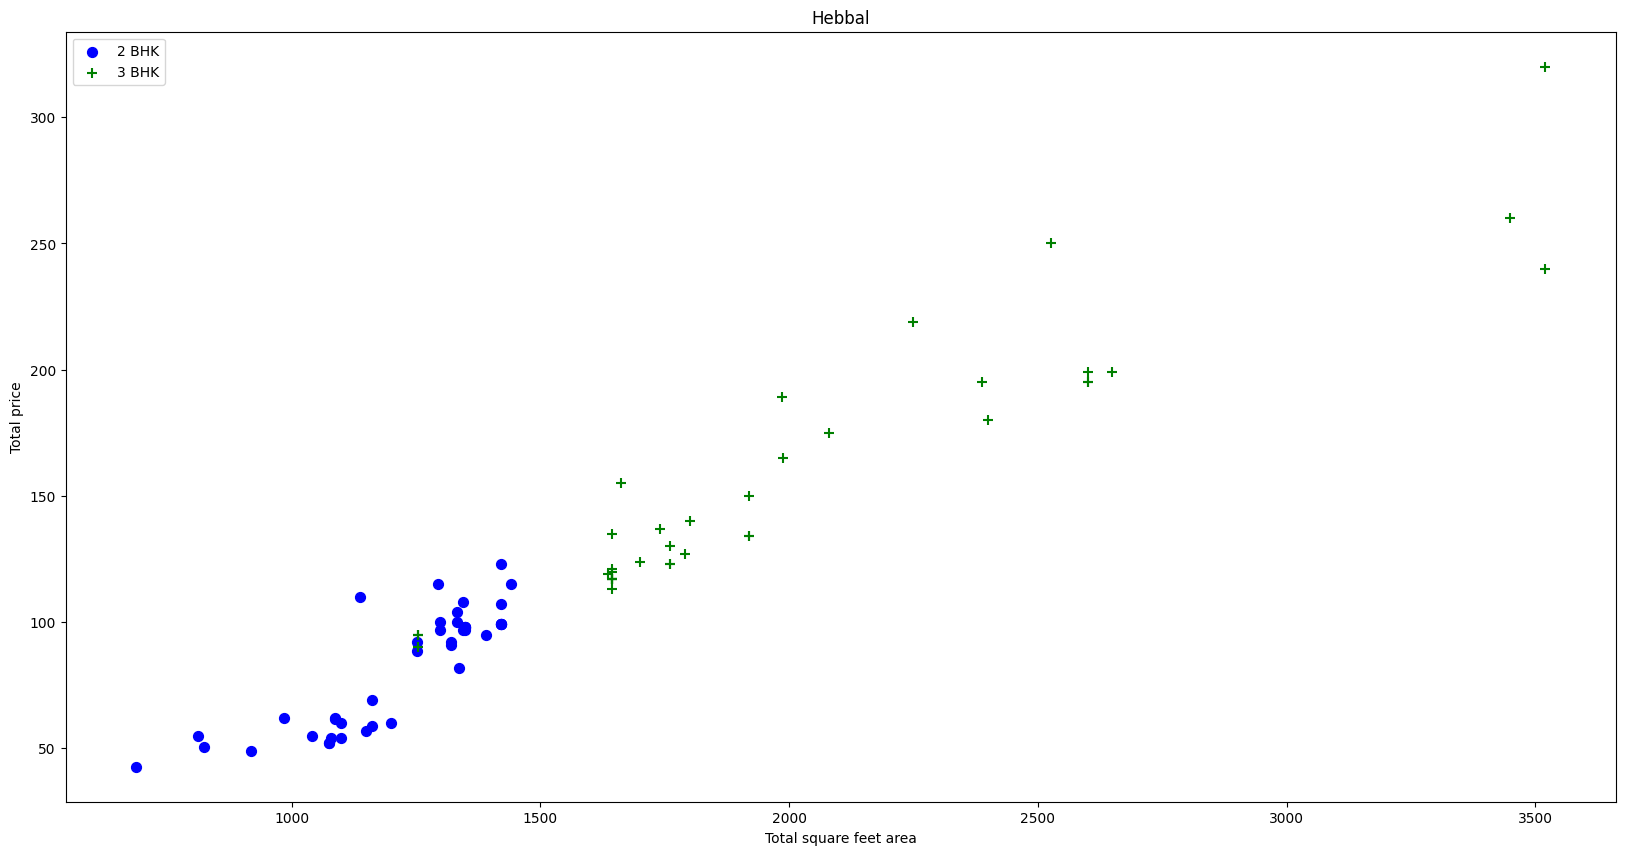

In [86]:
plot_scatter_chart(df4, 'Hebbal')

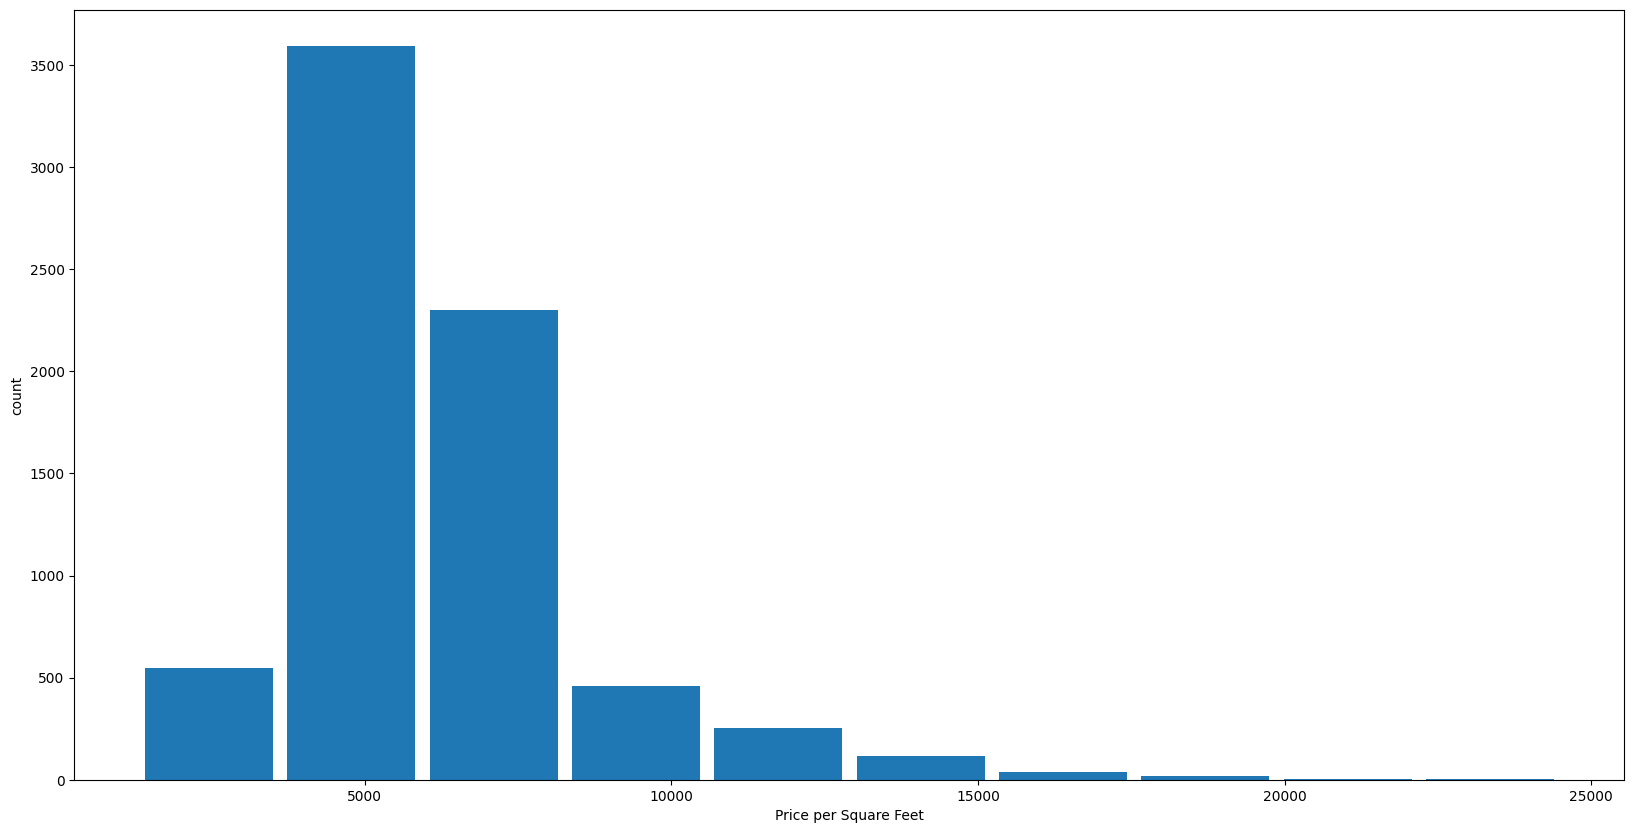

In [87]:
#check the distrbution of the data in that categoray

plt.hist(df4.price_per_sqft, rwidth= 0.9)
plt.xlabel('Price per Square Feet')
plt.ylabel('count')
plt.show()

In [88]:
df4[df4['bath']>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


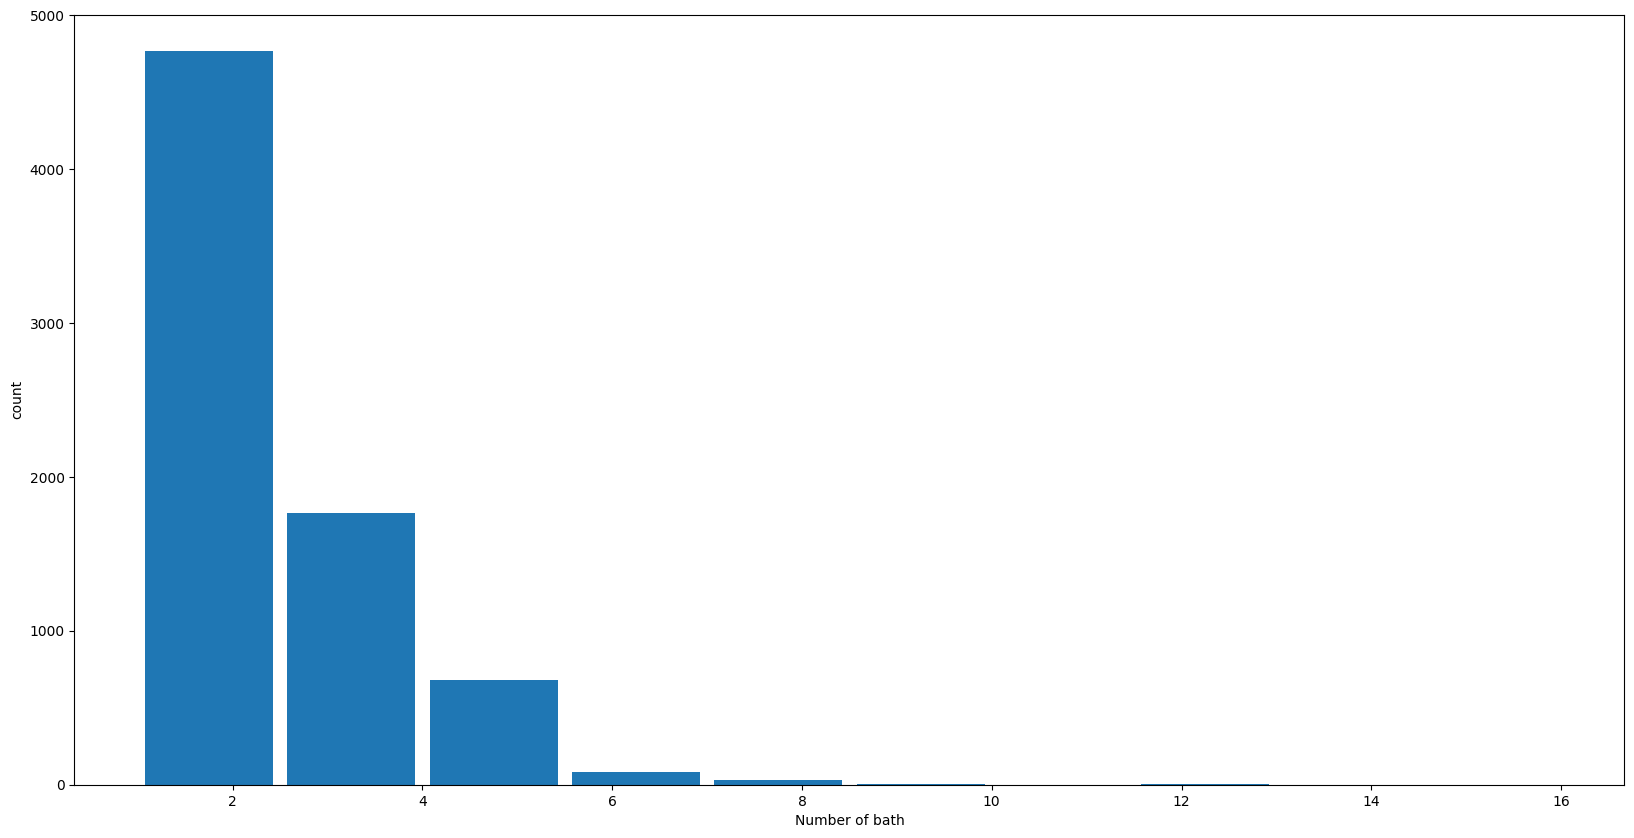

In [89]:
plt.hist(df4.bath, rwidth= .9)
plt.xlabel('Number of bath')
plt.ylabel('count')
plt.show()

In [90]:
df4[df4.bath > df4.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [91]:
df4 = df4[df4.bath < df4.bhk+2]
df4.shape

(7251, 7)

In [92]:
df4.drop(['price_per_sqft', 'size'], axis= 1, inplace= True)
df4.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


## **Save Cleand Data in New File as CSV**

In [49]:
df4.to_csv('cleaned_data.csv', index=False)

# **Read Cleaned Data To `Train The Model`**

In [93]:
df_cleaned = pd.read_csv('cleaned_data.csv')
df_cleaned.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


## **Working on `Model`**

### **Import Libraries**

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


### **Preparing Data**

In [120]:
df_train = pd.get_dummies(df_cleaned, columns=['location'], prefix='', prefix_sep='', drop_first= True)

In [121]:
df_train.shape

(7251, 245)

In [122]:
X = df_train.drop('price', axis= 1)
y = df_train['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 10)

### **Train and Test The `Model`**

In [123]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

0.8452277697872425

In [125]:
cv = ShuffleSplit(n_splits= 5, test_size= 0.2, random_state= 0)

cross_val_score(LinearRegression(), X, y, cv= cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [130]:
def find_the_best_model_using_gridsearchcv(X, y):
    algos = { 
        'LinearRegression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


In [131]:
find_the_best_model_using_gridsearchcv(X, y)

,model,best_score,best_params
0,LinearRegression,0.818354,"{'fit_intercept': True, 'positive': False}"
1,lasso,0.699273,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.772800,"{'criterion': 'squared_error', 'splitter': 'ra..."


### **Price `Prediction`**

In [132]:
def price_prediction(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return lr_model.predict([x])[0]

In [139]:
price_prediction('1st Phase JP Nagar', 1000, 2, 2)

c:\Users\hussi\.conda\envs\Note_Book\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.4990467691027

In [144]:
price_prediction('1st Phase JP Nagar', 1000, 2, 3)

c:\Users\hussi\.conda\envs\Note_Book\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.72616900481566

In [143]:
price_prediction('Indira Nagar', 1000, 2, 2)

c:\Users\hussi\.conda\envs\Note_Book\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.278154840091

## **Export The `Model`**

In [145]:
import pickle

with open('banglore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_model, f)

In [146]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}

with open("columns.json", "w") as f:
    f.write(json.dumps(columns))